In [ ]:
#Medición del tiempo de inicio
import time

# Registrar el tiempo actual en el momento del inicio
inicio = time.time()

# Carga de Paquetes y Librerias

In [ ]:
# Basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
from pandas.plotting import scatter_matrix
from tabulate import tabulate
from numpy import array
import datetime as dt           # Permite trabajar con fechas

# Machine learning packages
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline


# Reducción de dimensiones
from sklearn.decomposition import PCA

# Regresión lineal
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Métricas de rendimiento
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import bartlett

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Pretty print
from pprint import pprint

#SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Google
from google.colab import files  # Permite descargar archivos directamente desde Colab

# Instalar la biblioteca deepsig si no está instalada
!pip install deepsig

# Importar las funciones necesarias de deepsig
from deepsig import aso
from deepsig import multi_aso
from deepsig import bootstrap_power_analysis

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', '.*do not.*', )

# Mostrar advertencia personalizada
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

# Carga de Base de Datos

In [ ]:
# Cargar datos de demanda energética comercial en Colombia desde Google Drive (acceso libre)

# Código de identificación del archivo en Google Drive
FILEID = "1y8yY85w4Eyr_LCmoKO7c31BZ7gEWfAMN"  # Copiar el código desde el enlace generado en Google Drive

# Descargar el archivo utilizando wget y gestionar las cookies temporales
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Score.zip && rm -rf /tmp/cookies.txt

# Descomprimir el archivo descargado en el directorio principal de Colab
!unzip Score.zip

# Mostrar el contenido del directorio actual
!dir

--2023-07-30 19:59:15--  https://docs.google.com/uc?export=download&confirm=&id=1y8yY85w4Eyr_LCmoKO7c31BZ7gEWfAMN
Resolving docs.google.com (docs.google.com)... 173.194.216.100, 173.194.216.102, 173.194.216.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.216.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s2k4mfnvnl4v1hpv6ud4k0fq76nie77b/1690747125000/15940467605774616319/*/1y8yY85w4Eyr_LCmoKO7c31BZ7gEWfAMN?e=download&uuid=d2d1b37f-4c3c-4617-8741-c310eb410e08 [following]
--2023-07-30 19:59:15--  https://doc-08-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s2k4mfnvnl4v1hpv6ud4k0fq76nie77b/1690747125000/15940467605774616319/*/1y8yY85w4Eyr_LCmoKO7c31BZ7gEWfAMN?e=download&uuid=d2d1b37f-4c3c-4617-8741-c310eb410e08
Resolving doc-08-6k-docs.googleusercontent.com (doc-08-6k-docs.googleusercontent.com)... 108.177.11.13

In [ ]:
# Importar la librería pandas y leer el archivo Excel
import pandas as pd
df = pd.read_excel('/content/MSE_Score.xlsx')

# Rellenar los valores faltantes con la media de cada columna
df.fillna(df.mean(), inplace=True)

# Obtener los nombres de las columnas del DataFrame
column_names = df.columns

Index(['SVR', 'OLS', 'RNN U 36', 'MPL U 30', 'RNN M 36S', 'LSTM M 18',
       'GRU M 18S'],
      dtype='object')

<Axes: xlabel='Grup', ylabel='MSE'>

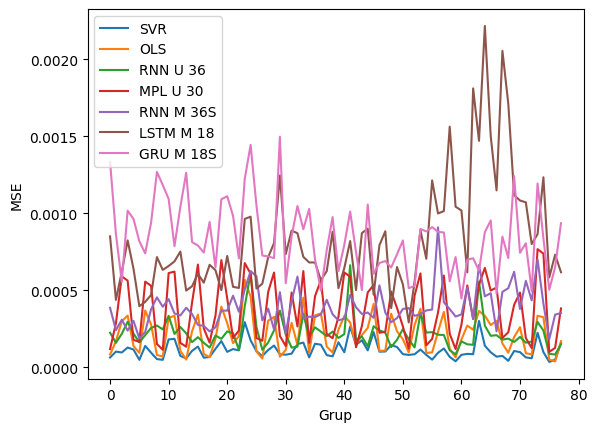

In [ ]:
# Graficar los datos del DataFrame
df.plot(ylabel='MSE', xlabel='Grupo')

In [ ]:
# Seleccionar las columnas del DataFrame por nombre y asignarlas a variables
SVR = df['SVR']
OLS = df['OLS']
RNN_UV = df['RNN U 36']
MPL = df['MPL U 30']
RNN_MV = df['RNN M 36S']
LSTM = df['LSTM M 18']
GRU = df['GRU M 18S']

# Realizar el análisis de potencia bootstrap en cada una de las variables
# El argumento show_progress se establece en False para no mostrar el progreso del cálculo
power = bootstrap_power_analysis(SVR, show_progress=False)

# Imprimir el resultado del análisis de potencia
print(power)

0.8884


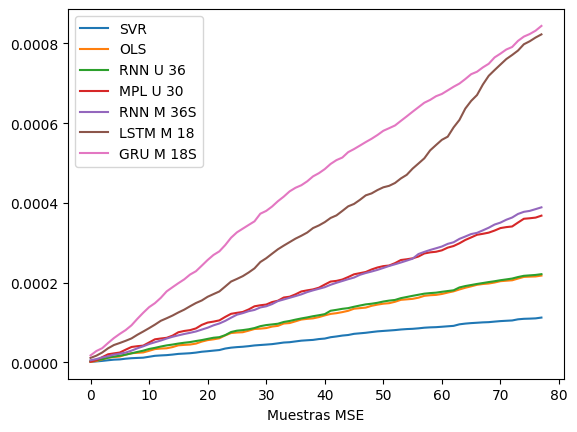

In [ ]:
# Calculate the CDF
cdf = np.cumsum(df) / len(df)

# Plot the CDF
plt.plot(cdf, label=df.columns)
plt.xlabel('Muestras MSE')
plt.legend()
plt.show()

In [ ]:
# Semilla para reproducibilidad
seed = 42

# Calcular el valor mínimo de epsilon utilizando el método ASO
# Pasar los valores de SVR y GRU al método aso() junto con la semilla
min_eps = aso(SVR.values, GRU.values, seed=seed)

# Imprimir el valor mínimo de epsilon calculado
print(min_eps)

Bootstrap iterations: 100%|█████████▉| 999/1000 [00:14<00:00, 70.33it/s]

0.9987874022297794


In [ ]:
# Obtener los valores de la DataFrame en formato de matriz
Valores = df.values

# Transponer la matriz para que cada columna represente una serie
ValoresT = Valores.T

# Calcular los valores mínimos de epsilon utilizando el método multi_aso
# Pasar la matriz transpuesta ValoresT, el nivel de confianza y la semilla al método multi_aso()
eps_min = multi_aso(ValoresT, confidence_level=0.95, seed=seed)

Model comparisons: 100%|█████████▉| 20979/21000 [03:39<00:00, 95.61it/s]


In [ ]:
# Crear un DataFrame a partir de los valores mínimos de epsilon obtenidos
DF_eps_min = pd.DataFrame(eps_min, columns=df.columns)

# Establecer el índice del DataFrame como los nombres de las columnas de df
DF_eps_min.set_index(df.columns, inplace=True)

print(DF_eps_min)

,SVR,OLS,RNN U 36,MPL U 30,RNN M 36S,LSTM M 18,GRU M 18S
SVR,1.000000,1.000000,0.999839,0.999882,0.999200,0.999906,0.998792
OLS,0.000179,1.000000,0.904177,1.000000,0.998349,0.999893,0.998390
RNN U 36,0.001476,0.838769,1.000000,1.000000,1.000000,1.000000,0.998766
MPL U 30,0.000373,0.001930,0.001660,1.000000,0.976034,1.000000,0.998173
RNN M 36S,0.001911,0.005126,0.005042,0.653210,1.000000,1.000000,0.998990
LSTM M 18,0.001008,0.001384,0.001051,0.001634,0.000823,1.000000,0.622022
GRU M 18S,0.001794,0.002514,0.002017,0.003398,0.002160,1.000000,1.000000


In [ ]:
# Nombre del archivo en el que se guardará el DataFrame con los valores mínimos de epsilon
nombre_archivo = 'Result_ASO_MSE.xlsx'

# Guardar el DataFrame DF_eps_min en un archivo Excel
DF_eps_min.to_excel(nombre_archivo, index=True)


# tiempo

In [ ]:
# Cálculo del tiempo transcurrido

# Registrar el tiempo de finalización
fin = time.time()

# Calcular el tiempo transcurrido
tiempo_transcurrido = fin - inicio

# Imprimir el tiempo transcurrido en segundos
print("Tiempo transcurrido: ", tiempo_transcurrido, "segundos")

Tiempo transcurrido:  255.21789860725403 segundos
